In [1]:
import numpy as np
import math
import functools

# create rate change matrix Q for problem:
# t - time, t = 1 is 10 day
# S1 -> rate change in T period: leave S1 / number of iteractions in S1: 1/10
# S2 -> -//- : 9/10

T = 10.0
Q = np.array([[-0.1,0.1],[0.3,-0.3]]) # setup rates
I = np.identity(2)
eig,S = np.linalg.eig(Q)
SInv = np.linalg.inv(S)

def Power(q):
    return np.dot(S,np.dot(np.diag(np.power(eig,q)),SInv))

def Prob(v: float):
    t = v / T
    #Power series I + sum(i=0 to inifotity )Power(Q,i)*np.power(t,i) / math.factorial(i)
    P = I + functools.reduce(lambda x,i: x + Power(i)*np.power(t,i) / math.factorial(i), range(0,100))
    return P
    #return I + Power(1)*np.power(t,1) / math.factorial(1) + Power(2)*np.power(t,2) / math.factorial(2)

TypeError: object of type 'int' has no len()

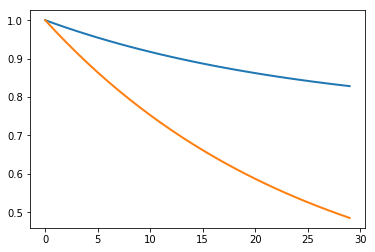

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
import numpy as np

r = range(0,30)
s1 = list(map(lambda i: Prob(i)[0] , r)) # S1
s2 = list(map(lambda i: Prob(i)[1] , r)) # S2

plt.plot(list(r),list(map(lambda x:x[0],s1)),linewidth=2.0)
plt.plot(list(r),list(map(lambda x:x[1],s2)),linewidth=2.0)

#Prob(1), math.exp(-0.1)
mu = 0.1
k = 1
Prob(1),math.exp(-mu) * mu**k / math.factorial(k)

p,k,n = 0.1,1,1
np.choose(2, 4) 

#* math.power(p,k) * (1-p)*math.power(n-k)

# result of flipping a coin 10 times, tested 1000 times.




